In [1]:
# 라이브러리 임포트
import torch
import numpy as np
import matplotlib.pyplot as plt

from torchviz import make_dot

## 다양한 계수의 텐서 만들기

In [2]:
# 0계 텐서(스칼라)
r0 = torch.tensor(1.0).float()

# type 확인
print(type(r0))

# dtype 확인
print(r0.dtype)

<class 'torch.Tensor'>
torch.float32


In [3]:
# shape 확인
print(r0.shape)

# 데이터 확인
print(r0.data)

torch.Size([])
tensor(1.)


In [4]:
# 1계 텐서(벡터)

# 1계 넘파이 변수 작성
r1_np = np.array([1, 2, 3, 4, 5])
print(r1_np.shape)

# 넘파이에서 텐서 변환
r1 = torch.tensor(r1_np).float()

# dtype 확인
print(r1.dtype)

# shape 확인
print(r1.shape)

# 데이터 확인
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [5]:
# 2계 텐서(행렬)

# 2계 넘파이 변수 작성
r2_np = np.array([[1, 5, 6], [4, 3, 2]])
print(r2_np.shape)

# 넘파이에서 텐서로 변환
r2 = torch.tensor(r2_np).float()

# shape 확인
print(r2.shape)

# 데이터 확인
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [6]:
# 3계 텐서

# 난수 seed 초기화
torch.manual_seed(42)

# shape = [3, 2, 2]의 정규분포 텐서 작성
r3 = torch.randn((3, 2, 2))

# shape 확인
print(r3.shape)

# 데이터 확인
print(r3.data)

torch.Size([3, 2, 2])
tensor([[[ 0.3367,  0.1288],
         [ 0.2345,  0.2303]],

        [[-1.1229, -0.1863],
         [ 2.2082, -0.6380]],

        [[ 0.4617,  0.2674],
         [ 0.5349,  0.8094]]])


In [7]:
# 4계 텐서

# 요소가 모두 1인 shape = [2, 3, 2, 2] 텐서 작성
r4 = torch.ones((2, 3, 2, 2))

# shape 확인
print(r4.shape)

# 데이터 확인
print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


In [8]:
# 정수형 텐서로 변환
r5 = r1.long()

# dtype 확인
print(r5.dtype)

# 값 확인
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


In [9]:
# View 함수
# 2계화
# 요소 수를 -1로 지정하면 이 수를 자동으로 조정
r6 = r3.view(3, -1)

# shape 확인
print(r6.shape)

# 값 확인
print(r6)

torch.Size([3, 4])
tensor([[ 0.3367,  0.1288,  0.2345,  0.2303],
        [-1.1229, -0.1863,  2.2082, -0.6380],
        [ 0.4617,  0.2674,  0.5349,  0.8094]])


In [10]:
# 1계화
r7 = r3.view(-1)

# shape 확인
print(r7.shape)

# 값 확인
print(r7)

torch.Size([12])
tensor([ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082, -0.6380,
         0.4617,  0.2674,  0.5349,  0.8094])


In [11]:
# item 함수
# 스칼라 텐서(0계 텐서)는 item 함수로 값을 꺼낼 수 있음
item = r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [12]:
# 스칼라 이외의 텐서에 item 함수는 무효함
print(r1.item)

<built-in method item of Tensor object at 0x0000021EEB6457C0>


In [13]:
# 요소 수가 하나뿐인 1계 텐서는 괜찮
t1 = torch.ones(1)

# shape 확인
print(t1.shape)

# item 함수 호출
print(t1.item())

torch.Size([1])
1.0


In [14]:
# max 함수
print(r2)

print(r2.max())

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)


In [15]:
# torch.max 함수
# 두번째 인수는 기준이 되는 축 의미
print(torch.max(r2, 1))

torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))


In [16]:
# 몇 번째 요소가 최댓값인지 indices 확인을 통해 알 수 있음
# 아래 계산은 다중 분류에서 예측 라벨을 구할 떄, 자주 사용되는 표현
print(torch.max(r2, 1)[1])

tensor([2, 0])


In [17]:
# 넘파이 변수로 변환
r2_np = r2.data.numpy()

# type 확인
print(type(r2_np))

# 값 확인
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


In [18]:
# 2차 함수의 경사 계산
# x를 넘파이 배열로 정의
x_np = np.arange(-2, 2.1, 0.25)

# x값 표시
print(x_np)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]


In [19]:
# requires_grad = True로 설정
x = torch.tensor(x_np, requires_grad = True,
                 dtype = torch.float32)

# 결과 확인
print(x)

tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


In [20]:
# 2차 함수의 계산
# 계산 그래프는 내부에서 자동 생성
y = 2 * x**2 + 2

# y의 계산 결과
print(y)

tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


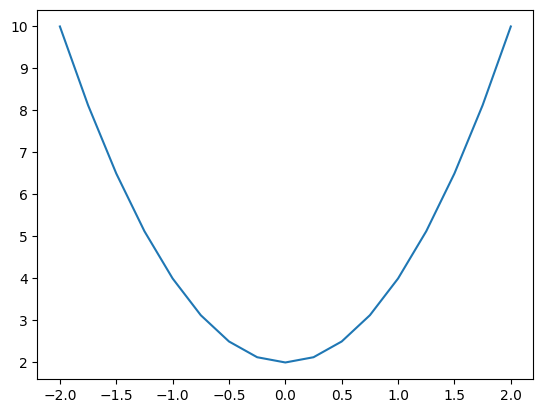

In [21]:
# 그래프 출력
plt.plot(x.data, y.data)
plt.show()

In [22]:
# 경사 계산을 위해 최종 값은 스칼라여야함으로 더미로 sum 함수를 붙임
z = y.sum()

In [34]:
# 계산 그래프 시각화
# g = make_dot(z, params = {'x' : x})
# display(g)

In [24]:
# 경사 계산
z.backward()

In [25]:
# 경삿값 가져오기
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


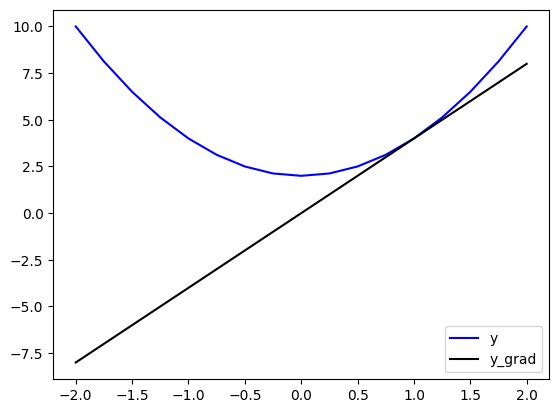

In [26]:
# 원래 함수와 경사 그래프
plt.plot(x.data, y.data, c = 'b', label = 'y')
plt.plot(x.data, x.grad.data, c = 'k', label = 'y_grad')
plt.legend()
plt.show()

In [27]:
# 경사를 초기화하지 않고 두번째 경사를 계산
y = 2 * x** 2 + 2
z = y.sum()
z.backward()

# x의 경사 확인
print(x.grad)

tensor([-16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,
          8.,  10.,  12.,  14.,  16.])


In [28]:
# 경삿값의 초기화는 zer0_() 함수 사용
x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [29]:
# Sigmoid 함수 정의
sigmoid = torch.nn.Sigmoid()

In [30]:
# y값의 계산
y = sigmoid(x)

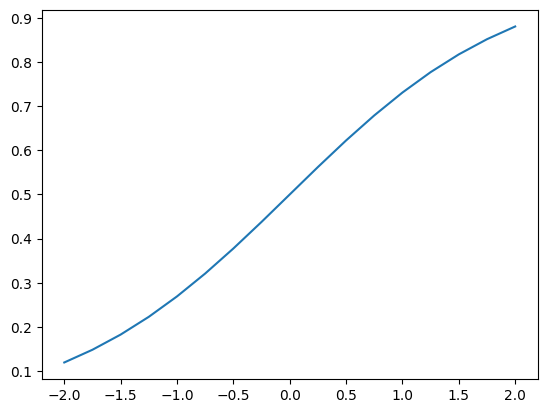

In [31]:
plt.plot(x.data, y.data)
plt.show()

In [32]:
# 경사 계싼을 위해 최종 값은 스칼라여야하므로 더미로 sum 함수 붙임
z = y.sum()

In [35]:
# # 계산 그래프 시각화
# g = make_dot(z, params = {'x' : x})
# display(g)

In [36]:
# 경사 계산
z.backward()

# 경삿값 확인
print(x.grad)

tensor([0.1050, 0.1261, 0.1491, 0.1731, 0.1966, 0.2179, 0.2350, 0.2461, 0.2500,
        0.2461, 0.2350, 0.2179, 0.1966, 0.1731, 0.1491, 0.1261, 0.1050])


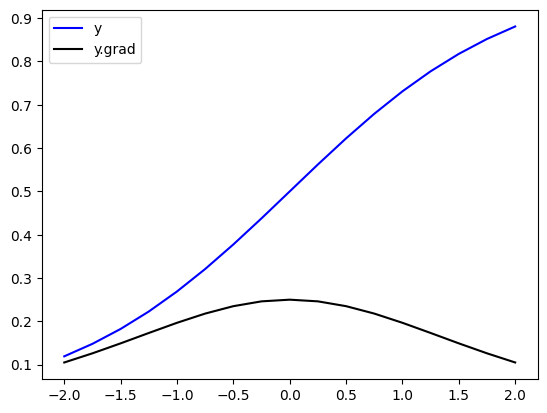

In [37]:
# 원래 함수와 경사 그래프
plt.plot(x.data, y.data, c = 'b', label = 'y')
plt.plot(x.data, x.grad.data, c = 'k', label = 'y.grad')
plt.legend()
plt.show()